In [30]:
import pandas as pd
import numpy as np

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Datasets loaded by scikit learn generally have a similar dictionary structure including:
* a DESCR key describing the dataset
* a data key containing an array with one row per instance and one column per feature
* a target key containing an array with the labels

In [6]:
X, y = mnist["data"], mnist["target"]

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

* Each image has 784 features.
* Each image is 28 x 28 pixels
* Each image has an intensity ranging from 0 (white) - 255 (black)

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
X.loc[0].values

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [55]:
some_digit = X.iloc[0].values

In [56]:
some_digit_image = some_digit.reshape(28,28)

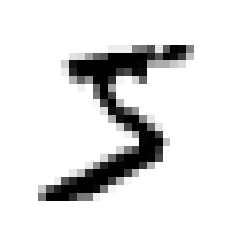

In [57]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [58]:
y.loc[0]

5

In [59]:
y = y.astype(np.uint8)

In [60]:
y[0]

5

In [61]:
X.shape

(70000, 784)

In [62]:
y.shape

(70000,)

* the MNIST dataset is already shuffled which is good 
* we can split the dataset into training and test set

In [63]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a binary classifier
## 5-detector

* we are trying to train a one digit classifier
* we are simply interest in identifying '`5`' and '``not-5``'

In [64]:
y_train_5 = (y_train==5)
y_test_5 = (y_test == 5)

## *Stochastic Gradient Descent* 

The SGD has the advantage of being capable to handle very large datasets efficiently

In [65]:
# instantiate the SGD classifier and fit the training sets
# remember y_train_5 is True for all labels 5 and false otherwise

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [66]:
# predicting on the X[0] which was a 5 should return True

sgd_clf.predict([some_digit])

/home/joaor/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Performance measures

### Measuring accuracy using cross validation

Occasionally you will need more control over the cross validation process than what scikit learn provides off-the-shelf. in these cases, you can implement cross validation yourself; it is actually straightforward. 

In [84]:
X_train.astype(np.int64)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone
# 
# skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
# 
# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = y_train_5[train_index]
#     X_test_fold = X_train[test_index]
#     y_test_fold = y_train_5[test_index]
#     
#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct/len(y_pred))

In [89]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

* The classifier gets above 93% on all cross validation folds
* Lets compare with a dumb classifier

In [90]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [91]:
never5_clf = Never5Classifier()

In [92]:
cross_val_score(never5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

* BOOOOM over 90%
* that is because only 10% of the images are 5s
* if you guess the image is not a 5 all the time you will be right 90% of the time

In [96]:
np.zeros((5, 1), dtype=bool)

array([[False],
       [False],
       [False],
       [False],
       [False]])

* this demonstrated why accuracy is not the preferred performance measure for classifiers.
* when dealing with skewed datasets if you guess the same answer all the time you will be right most of the time

## confusion matrix

* to compute a confusion matrix you first need to have a set of predictions
* to compare to actual targets

In [97]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

* `cross_val_predict` performs K-fold cross-validation returning the predictions made on each test fold
* you get a "clean" prediction for each instance (clean meaning the prediction is made by a model that never saw the data during the training)

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

* each row in the matrix represent an actual class
* each column represents a predicted class

# precision and recall

* **precision** - accuracy of positive predictions - $precision=\frac{TP}{TP+FP}$
* **recall** - true positive rate - $recall=\frac{TP}{TP+FN}$

In [101]:
from sklearn.metrics import precision_score, recall_score

In [102]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [103]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [104]:
from sklearn.metrics import f1_score

In [105]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

## prediction-recall trade-off

In [106]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [107]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

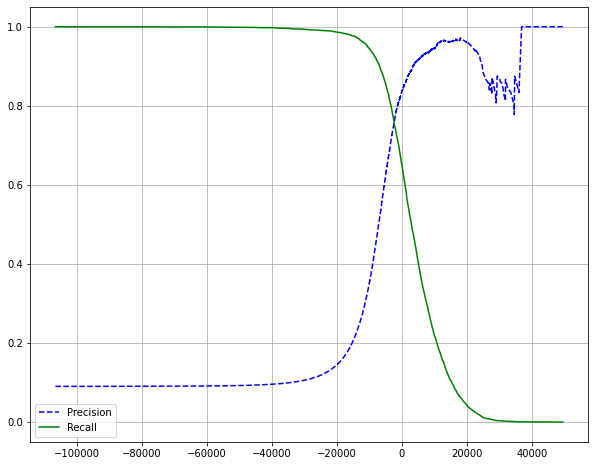

In [111]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 8))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
    plt.legend()
    plt.axis()
    plt.grid()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()